In [ ]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation




df = pd.read_csv("dadostratado.csv")
df.rename(columns={'DT_MEDICAO':'ds', 'VEN_VEL':'y'},inplace=True)
df

,Unnamed: 0,ds,TEM_INS,UMD_INS,y
0,0,2020-10-01 00:00,26.2,77.0,0.2
1,1,2020-10-01 01:00,25.7,80.0,0.1
2,2,2020-10-01 02:00,25.3,84.0,0.2
3,3,2020-10-01 03:00,24.7,87.0,0.2
4,4,2020-10-01 04:00,24.5,88.0,0.4
...,...,...,...,...,...
8755,8755,2021-09-30 19:00,30.9,68.0,0.7
8756,8756,2021-09-30 20:00,30.5,72.0,1.9
8757,8757,2021-09-30 21:00,27.4,85.0,1.8
8758,8758,2021-09-30 22:00,27.2,82.0,0.1


In [ ]:

del df['UMD_INS']
del df['Unnamed: 0']
del df['TEM_INS']
df

,ds,y
0,2020-10-01 00:00,0.2
1,2020-10-01 01:00,0.1
2,2020-10-01 02:00,0.2
3,2020-10-01 03:00,0.2
4,2020-10-01 04:00,0.4
...,...,...
8755,2021-09-30 19:00,0.7
8756,2021-09-30 20:00,1.9
8757,2021-09-30 21:00,1.8
8758,2021-09-30 22:00,0.1


In [ ]:
modelo = Prophet ()

modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
data_futuro = pd.to_datetime(df['ds'], format="%Y-%m-%d %H:%M")
data_futuro = pd.date_range(start='2020-10-1 00:00', end='2022-02-04 23:00', periods= 11424)


In [ ]:
type(data_futuro)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
data_futuro

DatetimeIndex([          '2020-10-01 00:00:00',
               '2020-10-01 01:02:01.018996760',
               '2020-10-01 02:04:02.037993521',
               '2020-10-01 03:06:03.056990282',
               '2020-10-01 04:08:04.075987043',
               '2020-10-01 05:10:05.094983804',
               '2020-10-01 06:12:06.113980565',
               '2020-10-01 07:14:07.132977326',
               '2020-10-01 08:16:08.151974087',
               '2020-10-01 09:18:09.170970848',
               ...
               '2022-02-04 13:41:50.829029152',
               '2022-02-04 14:43:51.848025912',
               '2022-02-04 15:45:52.867022672',
               '2022-02-04 16:47:53.886019432',
               '2022-02-04 17:49:54.905016192',
               '2022-02-04 18:51:55.924012952',
               '2022-02-04 19:53:56.943009720',
               '2022-02-04 20:55:57.962006480',
               '2022-02-04 21:57:58.981003240',
                         '2022-02-04 23:00:00'],
              dtype=

In [ ]:
dff = pd.DataFrame(data_futuro)

In [ ]:

dff.columns=['ds']

dff

,ds
0,2020-10-01 00:00:00.000000000
1,2020-10-01 01:02:01.018996760
2,2020-10-01 02:04:02.037993521
3,2020-10-01 03:06:03.056990282
4,2020-10-01 04:08:04.075987043
...,...
11419,2022-02-04 18:51:55.924012952
11420,2022-02-04 19:53:56.943009720
11421,2022-02-04 20:55:57.962006480
11422,2022-02-04 21:57:58.981003240


In [ ]:
dff

,ds
0,2020-10-01 00:00:00.000000000
1,2020-10-01 01:02:01.018996760
2,2020-10-01 02:04:02.037993521
3,2020-10-01 03:06:03.056990282
4,2020-10-01 04:08:04.075987043
...,...
11419,2022-02-04 18:51:55.924012952
11420,2022-02-04 19:53:56.943009720
11421,2022-02-04 20:55:57.962006480
11422,2022-02-04 21:57:58.981003240


In [ ]:
previsao =  modelo.predict(dff)

In [ ]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01 00:00:00.000000000,0.587906,-0.532601,0.948236,0.587906,0.587906,-0.356999,-0.356999,-0.356999,-0.289682,-0.289682,-0.289682,-0.067317,-0.067317,-0.067317,0.0,0.0,0.0,0.230906
1,2020-10-01 01:02:01.018996760,0.588014,-0.572443,0.905070,0.588014,0.588014,-0.406977,-0.406977,-0.406977,-0.335573,-0.335573,-0.335573,-0.071404,-0.071404,-0.071404,0.0,0.0,0.0,0.181037
2,2020-10-01 02:04:02.037993521,0.588123,-0.637023,0.839716,0.588123,0.588123,-0.480583,-0.480583,-0.480583,-0.405434,-0.405434,-0.405434,-0.075149,-0.075149,-0.075149,0.0,0.0,0.0,0.107540
3,2020-10-01 03:06:03.056990282,0.588232,-0.723236,0.827725,0.588232,0.588232,-0.545791,-0.545791,-0.545791,-0.467293,-0.467293,-0.467293,-0.078498,-0.078498,-0.078498,0.0,0.0,0.0,0.042440
4,2020-10-01 04:08:04.075987043,0.588341,-0.757547,0.755174,0.588341,0.588341,-0.574565,-0.574565,-0.574565,-0.493162,-0.493162,-0.493162,-0.081404,-0.081404,-0.081404,0.0,0.0,0.0,0.013775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,2022-02-04 18:51:55.924012952,1.638934,1.205664,3.136424,1.159042,2.124360,0.529748,0.529748,0.529748,0.460406,0.460406,0.460406,0.069341,0.069341,0.069341,0.0,0.0,0.0,2.168681
11420,2022-02-04 19:53:56.943009720,1.639162,0.988293,2.830527,1.159061,2.124873,0.287295,0.287295,0.287295,0.217587,0.217587,0.217587,0.069708,0.069708,0.069708,0.0,0.0,0.0,1.926457
11421,2022-02-04 20:55:57.962006480,1.639390,0.788288,2.618230,1.159080,2.125386,0.051847,0.051847,0.051847,-0.017607,-0.017607,-0.017607,0.069455,0.069455,0.069455,0.0,0.0,0.0,1.691237
11422,2022-02-04 21:57:58.981003240,1.639618,0.595054,2.429447,1.159098,2.125899,-0.111709,-0.111709,-0.111709,-0.180308,-0.180308,-0.180308,0.068600,0.068600,0.068600,0.0,0.0,0.0,1.527909


In [ ]:
previsao.loc[11401:11423]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11401,2022-02-04 00:15:37.582071256,1.634830,0.396806,2.268221,1.160019,2.115520,-0.323592,-0.323592,-0.323592,-0.298700,-0.298700,-0.298700,-0.024892,-0.024892,-0.024892,0.0,0.0,0.0,1.311238
11402,2022-02-04 01:17:38.601068024,1.635058,0.361993,2.135757,1.159902,2.115909,-0.369208,-0.369208,-0.369208,-0.351668,-0.351668,-0.351668,-0.017540,-0.017540,-0.017540,0.0,0.0,0.0,1.265850
11403,2022-02-04 02:19:39.620064784,1.635286,0.291008,2.041318,1.159785,2.116297,-0.433522,-0.433522,-0.433522,-0.423412,-0.423412,-0.423412,-0.010110,-0.010110,-0.010110,0.0,0.0,0.0,1.201764
11404,2022-02-04 03:21:40.639061544,1.635514,0.223768,2.019301,1.159668,2.116686,-0.480080,-0.480080,-0.480080,-0.477408,-0.477408,-0.477408,-0.002672,-0.002672,-0.002672,0.0,0.0,0.0,1.155434
11405,2022-02-04 04:23:41.658058304,1.635742,0.257590,2.059020,1.159552,2.117074,-0.490334,-0.490334,-0.490334,-0.495041,-0.495041,-0.495041,0.004707,0.004707,0.004707,0.0,0.0,0.0,1.145408
11406,2022-02-04 05:25:42.677055064,1.635970,0.166760,2.047462,1.159435,2.117531,-0.493073,-0.493073,-0.493073,-0.505030,-0.505030,-0.505030,0.011957,0.011957,0.011957,0.0,0.0,0.0,1.142897
11407,2022-02-04 06:27:43.696051824,1.636198,0.134079,2.006725,1.159318,2.118105,-0.530676,-0.530676,-0.530676,-0.549689,-0.549689,-0.549689,0.019013,0.019013,0.019013,0.0,0.0,0.0,1.105521
11408,2022-02-04 07:29:44.715048584,1.636426,0.065312,1.945917,1.159202,2.118673,-0.594667,-0.594667,-0.594667,-0.620476,-0.620476,-0.620476,0.025809,0.025809,0.025809,0.0,0.0,0.0,1.041759
11409,2022-02-04 08:31:45.734045344,1.636654,0.125351,1.906975,1.159085,2.119229,-0.603551,-0.603551,-0.603551,-0.635835,-0.635835,-0.635835,0.032285,0.032285,0.032285,0.0,0.0,0.0,1.033103
11410,2022-02-04 09:33:46.753042104,1.636882,0.318315,2.060528,1.158968,2.119742,-0.458559,-0.458559,-0.458559,-0.496941,-0.496941,-0.496941,0.038382,0.038382,0.038382,0.0,0.0,0.0,1.178323


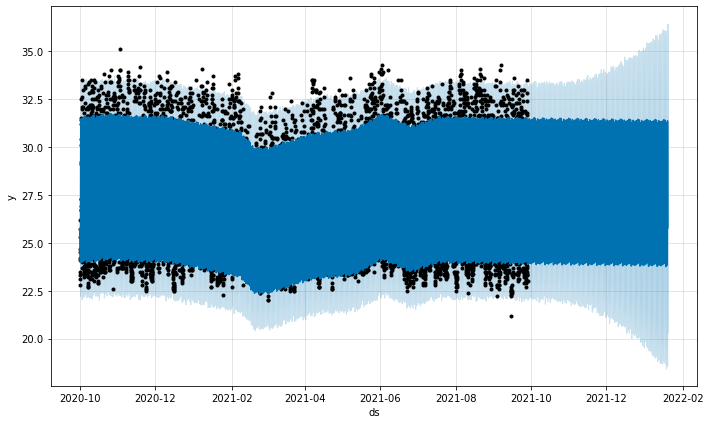

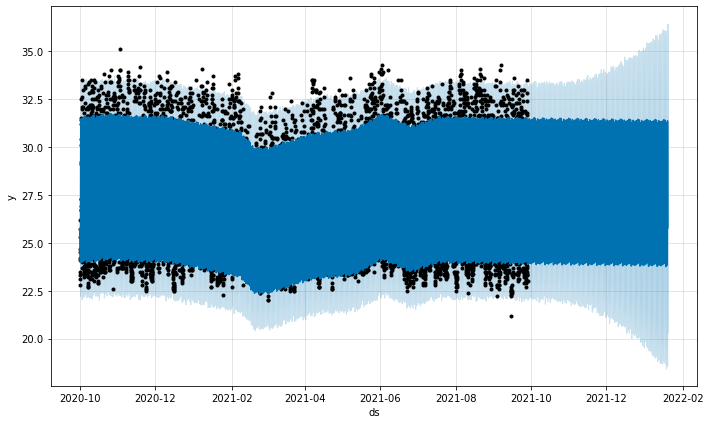

In [ ]:
modelo.plot(previsao)

In [ ]:
d_train, d_test = train_test_split(df, test_size = 0.3, shuffle = False)

In [ ]:
d_train

,ds,y
0,2020-10-01 00:00,26.2
1,2020-10-01 01:00,25.7
2,2020-10-01 02:00,25.3
3,2020-10-01 03:00,24.7
4,2020-10-01 04:00,24.5
...,...,...
6128,2021-06-13 08:00,24.2
6129,2021-06-13 09:00,23.9
6130,2021-06-13 10:00,24.1
6131,2021-06-13 11:00,26.0


In [ ]:
d_test

,ds,y
6132,2021-06-13,28.7
6133,2021-06-13,30.1
6134,2021-06-13,31.8
6135,2021-06-13,30.9
6136,2021-06-13,32.0
...,...,...
8755,2021-09-30,30.9
8756,2021-09-30,30.5
8757,2021-09-30,27.4
8758,2021-09-30,27.2


In [ ]:
modelo2 = Prophet()

modelo2.fit(d_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pd.DataFrame(d_test['ds'])

,ds
6132,2021-06-13
6133,2021-06-13
6134,2021-06-13
6135,2021-06-13
6136,2021-06-13
...,...
8755,2021-09-30
8756,2021-09-30
8757,2021-09-30
8758,2021-09-30


In [ ]:
prev = modelo2.predict(pd.DataFrame(d_test['ds']))

In [ ]:
prev['yhat']

0       27.276262
1       27.276262
2       27.276262
3       27.276262
4       27.276262
          ...    
2623    28.653560
2624    28.653560
2625    28.653560
2626    28.653560
2627    28.653560
Name: yhat, Length: 2628, dtype: float64

In [ ]:
y_prev = prev ['yhat'].values
y_true = d_test ['y'].values

In [ ]:
plt.plot(y_true, label = 'Verdadeiro')
plt.plot(y_prev, label = 'Previsao')
plt.legend()

NameError: ignored

In [ ]:
modelo2.plot(prev);

NameError: ignored